In [17]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import requests

In [37]:
url = '/Users/rajip/Documents/MIT/Data Science (MDA 512)/Assigment2/Energy_Consumption_Efficiency.csv'
df = pd.read_csv(url)
df.head()


,Energy_Consumed,Production_Output,Renewable_Energy_Usage,Equipment_Age,Maintenance_Frequency,Operator_Training,Downtime_Hours,Automation_Level,Industry_Type,Region,Efficiency_Class
0,1891.153010,17.233715,27.784401,4,2,Basic,18.640699,Medium,Manufacturing,East,Low
1,3132.728859,97.800943,78.890762,18,1,Advanced,34.170472,Low,Manufacturing,North,High
2,4527.735814,89.915841,28.768649,12,3,Basic,6.010864,Medium,Technology,South,Low
3,2380.619221,12.008692,18.205539,15,6,Basic,30.807997,Low,Manufacturing,East,High
4,2197.177334,30.269299,15.074026,8,1,Intermediate,16.196838,Medium,Technology,East,Low


In [35]:
print(df.shape[0]
,df.shape[1])

2.2.2
1000 11


In [51]:
df.isna().sum()
df.isnull().sum()

Energy_Consumed           0
Production_Output         0
Renewable_Energy_Usage    0
Equipment_Age             0
Maintenance_Frequency     0
Operator_Training         0
Downtime_Hours            0
Automation_Level          0
Industry_Type             0
Region                    0
Efficiency_Class          0
dtype: int64

In [53]:
df.describe()

,Energy_Consumed,Production_Output,Renewable_Energy_Usage,Equipment_Age,Maintenance_Frequency,Downtime_Hours
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,3057.215479,55.212837,45.121239,9.906000,5.892000,19.738371
std,1146.938581,26.538476,20.092294,5.500675,3.291986,11.465611
min,1001.740925,10.134204,10.078715,1.000000,1.000000,0.190654
25%,2127.439517,31.139289,28.161000,5.000000,3.000000,9.903890
50%,3026.915431,55.233483,45.167813,10.000000,6.000000,19.524635
75%,4110.919605,79.053641,61.897900,15.000000,9.000000,29.898896
max,4995.994077,99.986755,79.963448,19.000000,11.000000,39.979555


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Energy_Consumed         1000 non-null   float64
 1   Production_Output       1000 non-null   float64
 2   Renewable_Energy_Usage  1000 non-null   float64
 3   Equipment_Age           1000 non-null   int64  
 4   Maintenance_Frequency   1000 non-null   int64  
 5   Operator_Training       1000 non-null   object 
 6   Downtime_Hours          1000 non-null   float64
 7   Automation_Level        1000 non-null   object 
 8   Industry_Type           1000 non-null   object 
 9   Region                  1000 non-null   object 
 10  Efficiency_Class        1000 non-null   object 
dtypes: float64(4), int64(2), object(5)
memory usage: 86.1+ KB


array([[<Axes: title={'center': 'Energy_Consumed'}>,
        <Axes: title={'center': 'Production_Output'}>],
       [<Axes: title={'center': 'Renewable_Energy_Usage'}>,
        <Axes: title={'center': 'Equipment_Age'}>],
       [<Axes: title={'center': 'Maintenance_Frequency'}>,
        <Axes: title={'center': 'Downtime_Hours'}>]], dtype=object)

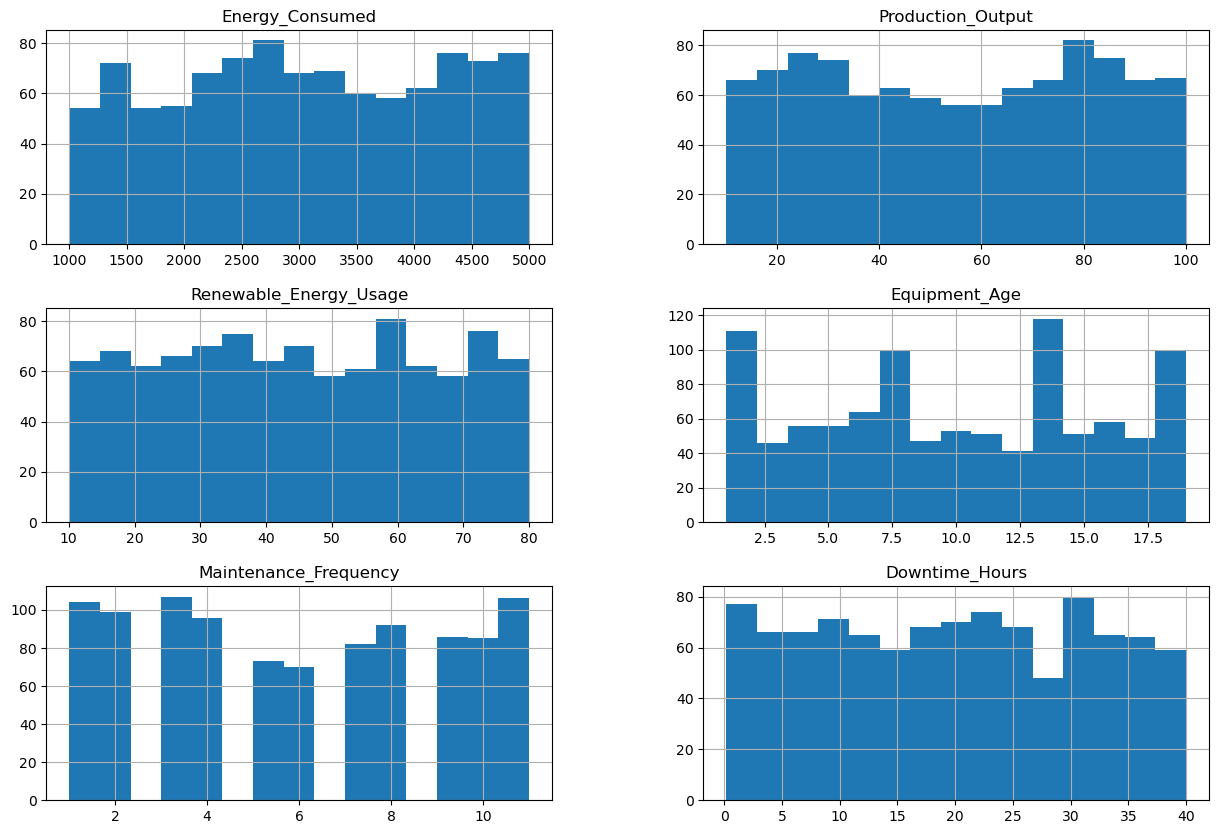

In [69]:
# Histogram for all numnerical features (Bivariate)
df.hist(bins=15, figsize=(15, 10))

<Axes: >

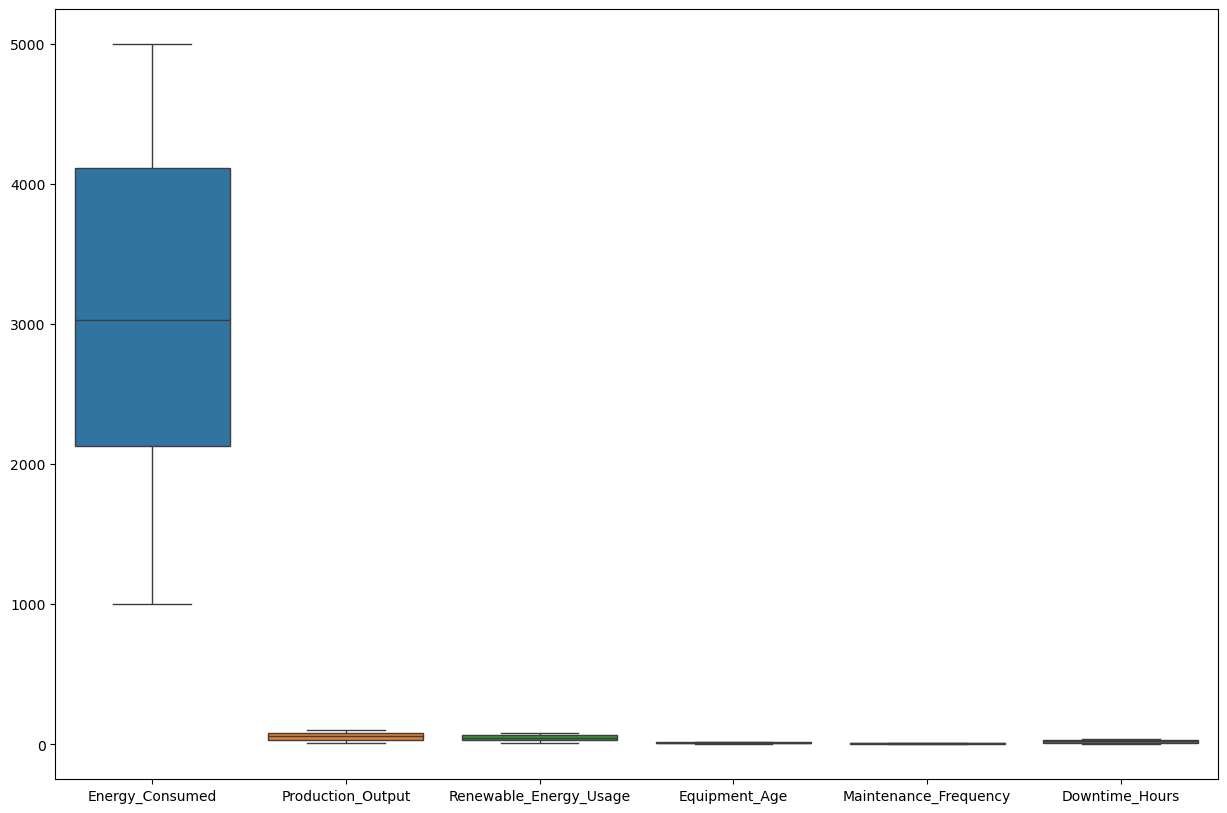

In [77]:
# Box plot for all numerical values in dataset (Bivariate)
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)


<class 'str'>


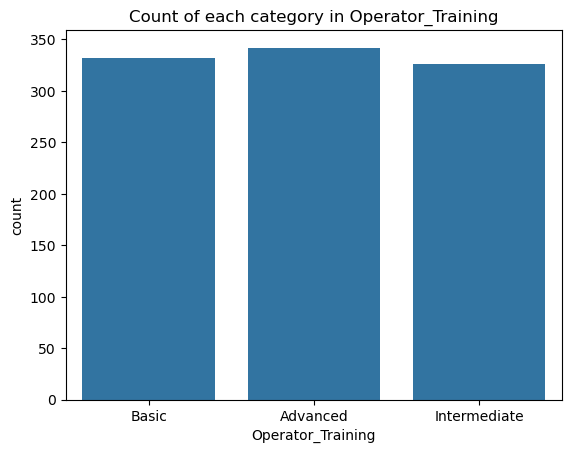

<class 'str'>


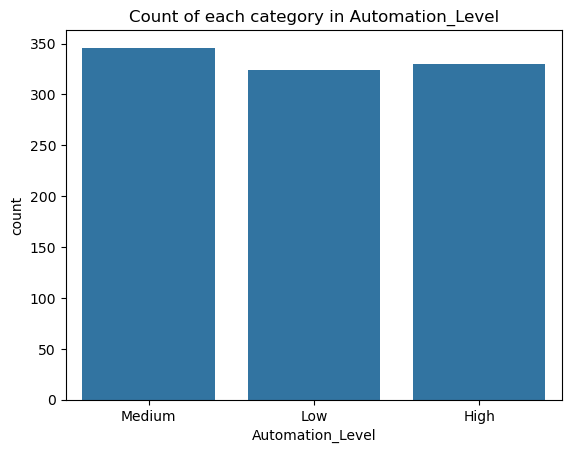

<class 'str'>


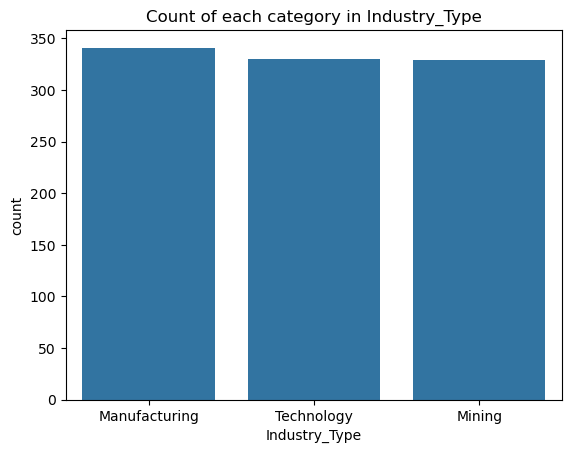

<class 'str'>


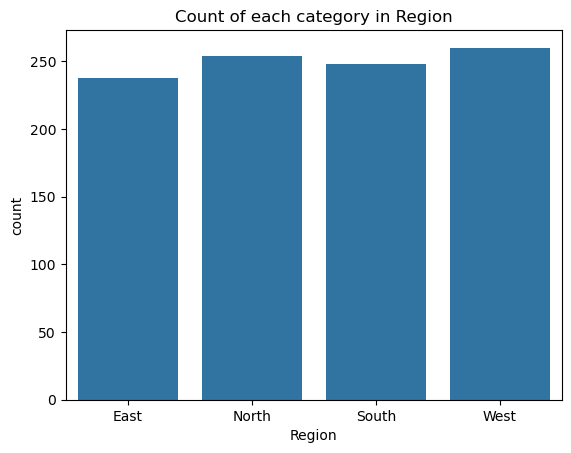

<class 'str'>


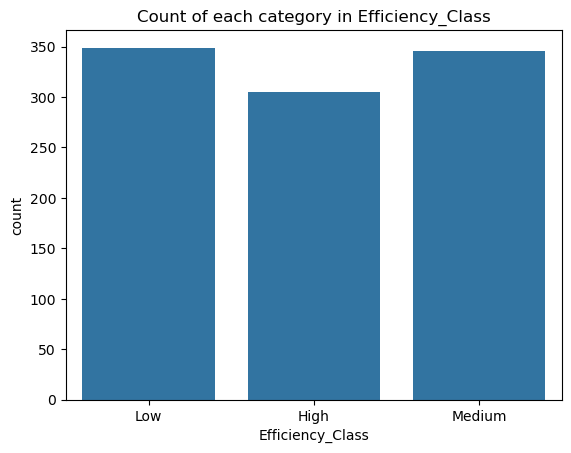

In [127]:
# (Bivariate) bar chart for column or groups
categorial_columns=df.select_dtypes(include=['object']).columns
for col in categorial_columns:
    fig=sns.countplot(data=df,x=col)
    fig.figsize=(20,20)
    print(type(col))
    plt.title("Count of each category in " +col)
    plt.show()

Index(['Energy_Consumed', 'Production_Output', 'Renewable_Energy_Usage',
       'Equipment_Age', 'Maintenance_Frequency', 'Downtime_Hours'],
      dtype='object')


<Figure size 1000x800 with 0 Axes>

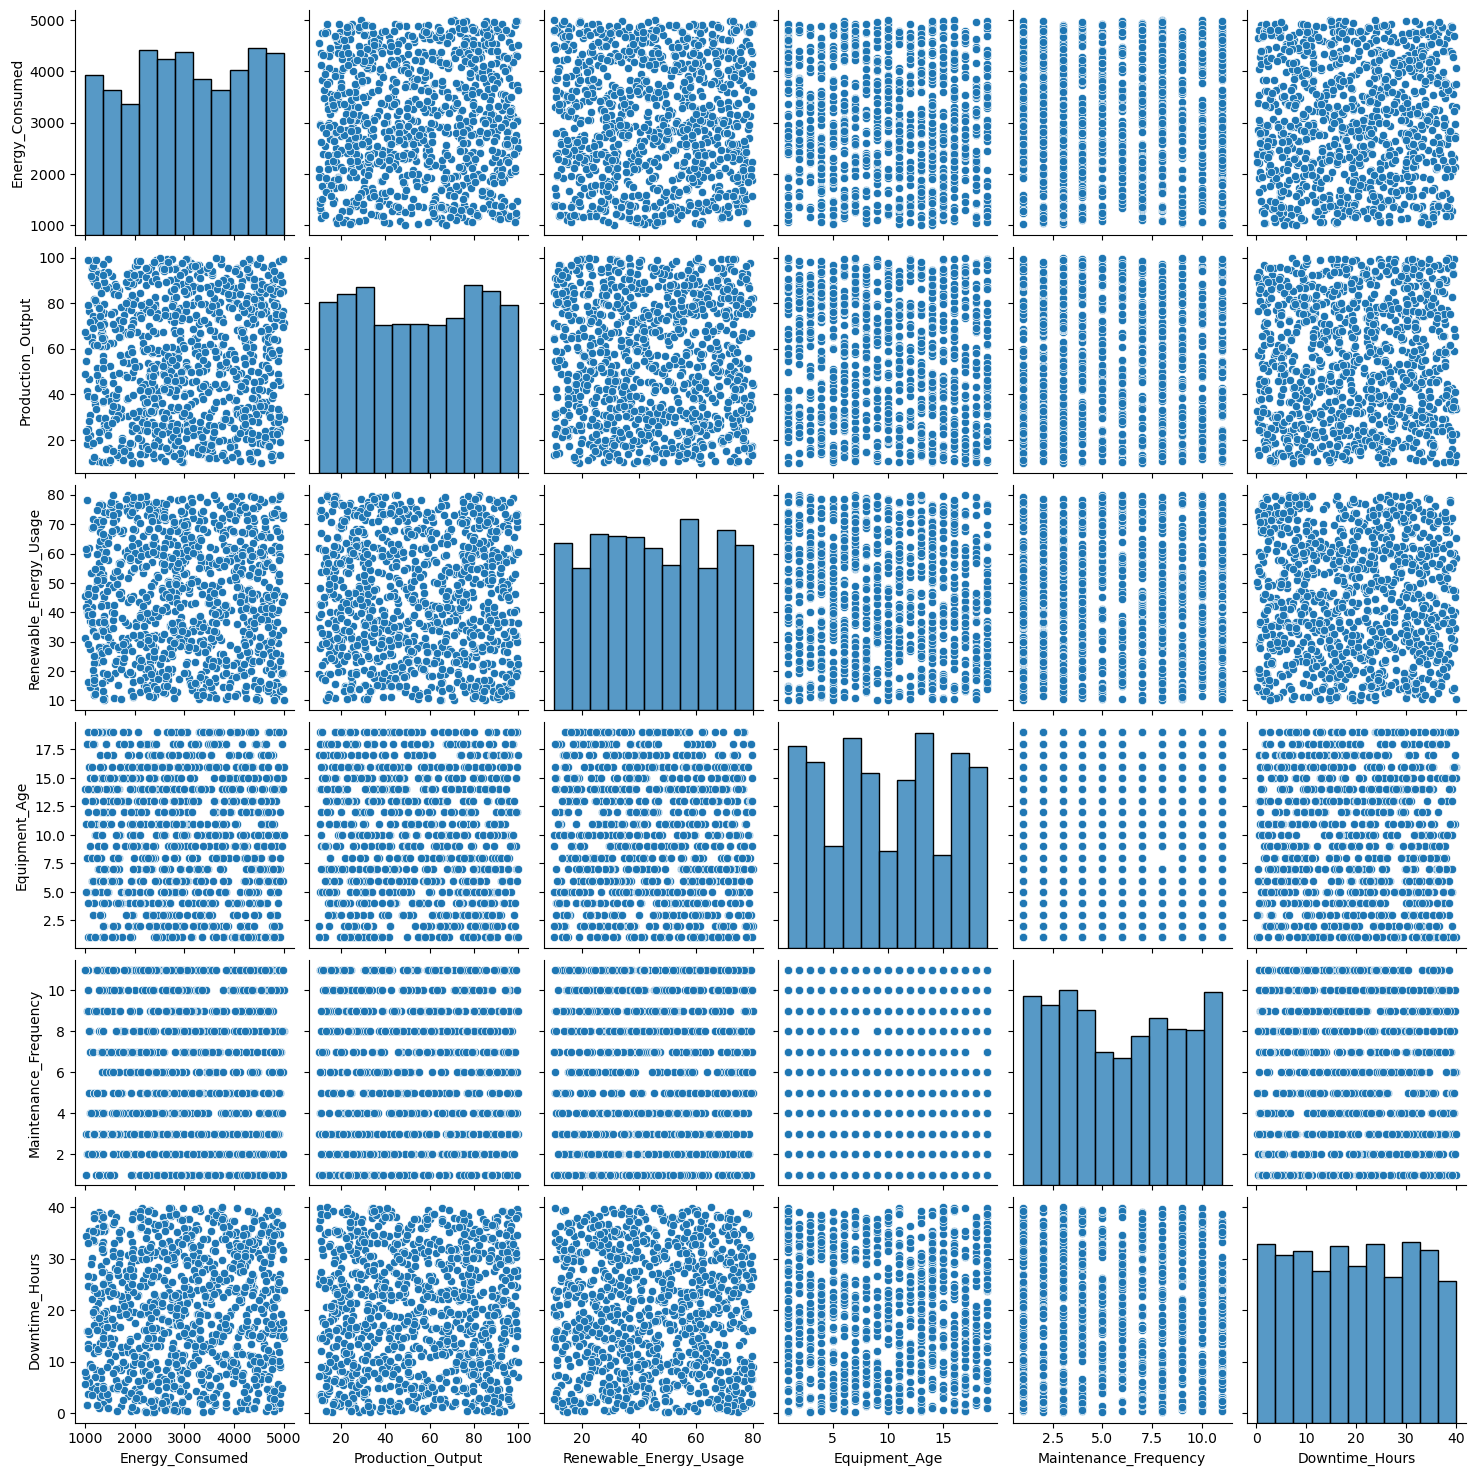

In [183]:
# Bivariate Diagrams
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
# Create a scatter plot matrix using seaborn
plt.figure(figsize=(10, 8))
print(numerical_columns)
sns.pairplot(df[numerical_columns])
plt.show()

Text(0.5, 1.0, 'Coorelation Heatmap')

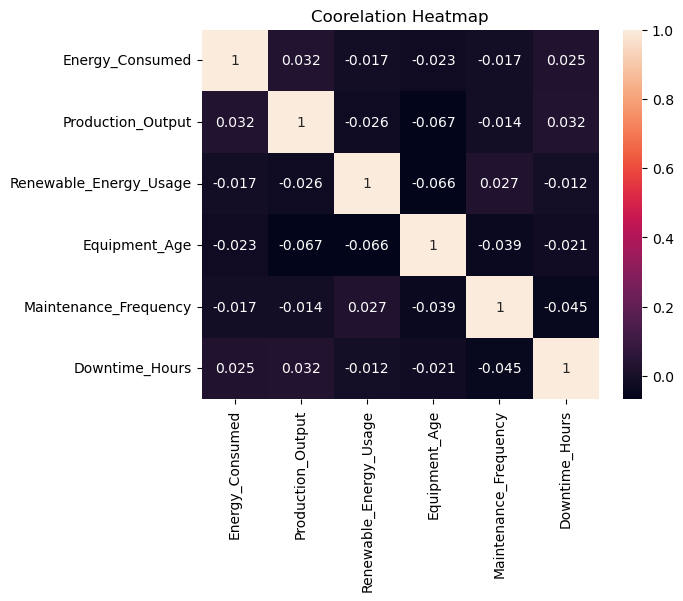

In [151]:
columns = df.select_dtypes(include=['int64', 'float64'])
coorelation_matrix=columns.corr()
sns.heatmap(coorelation_matrix,annot=True)
plt.title('Coorelation Heatmap')

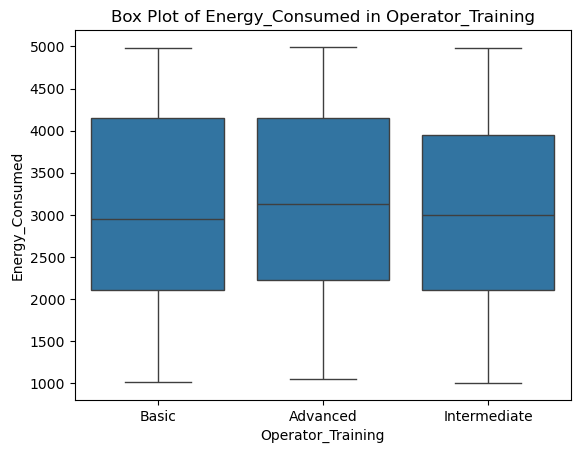

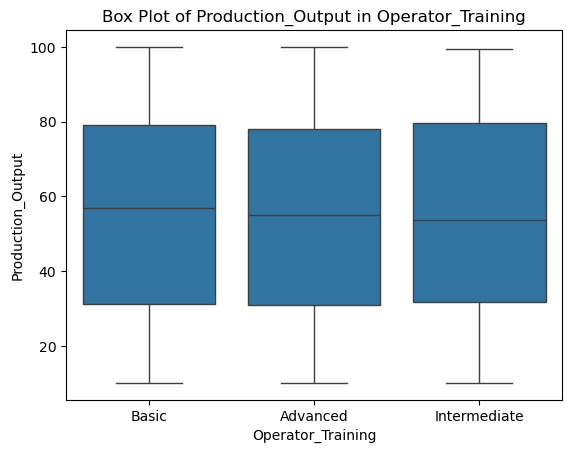

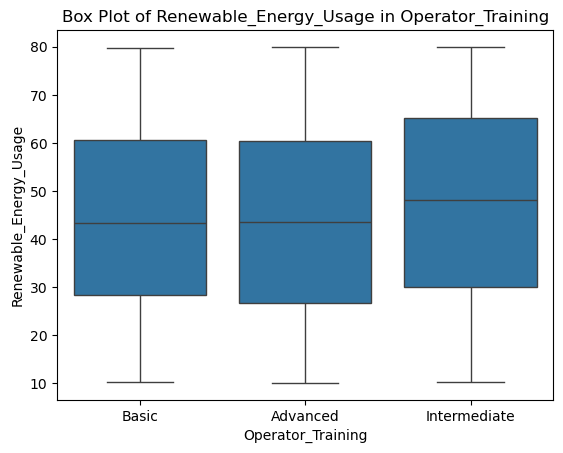

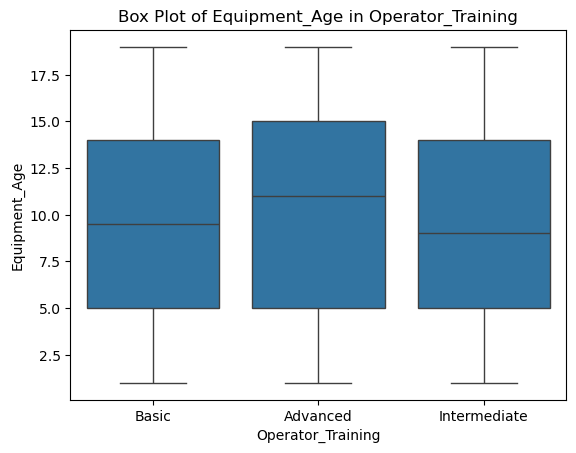

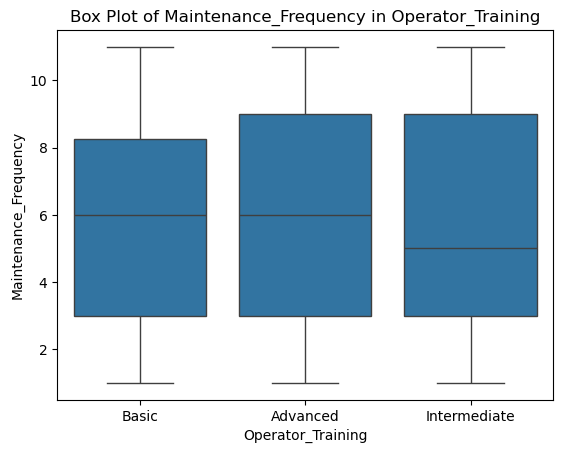

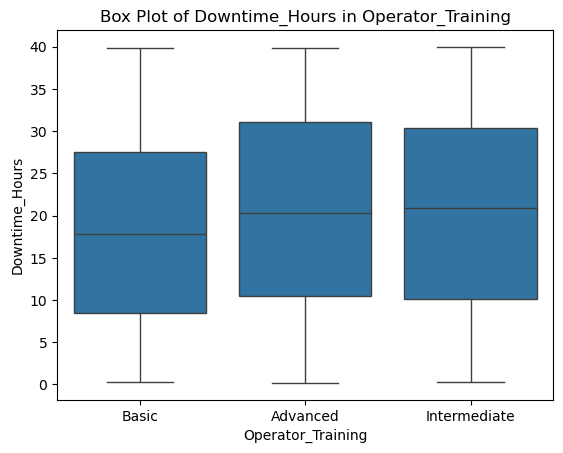

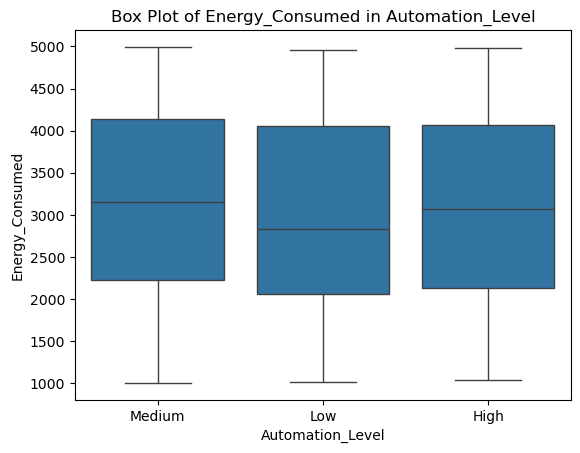

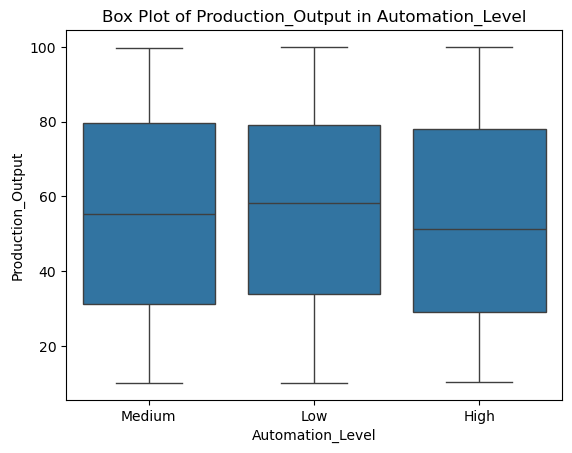

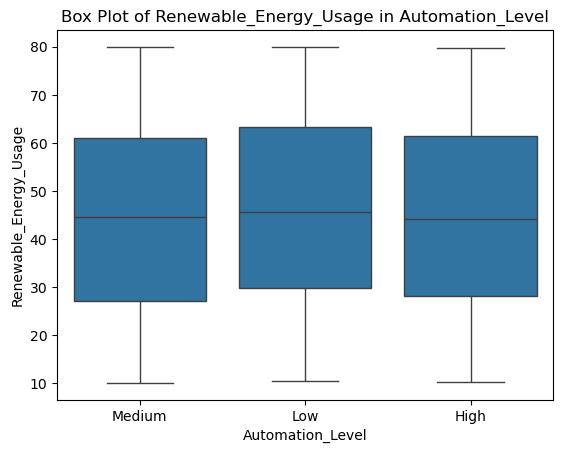

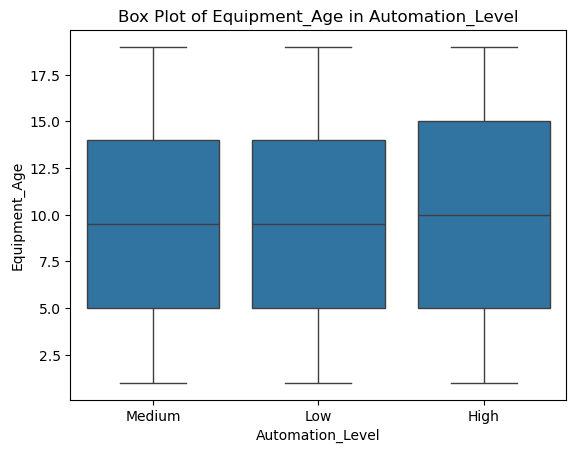

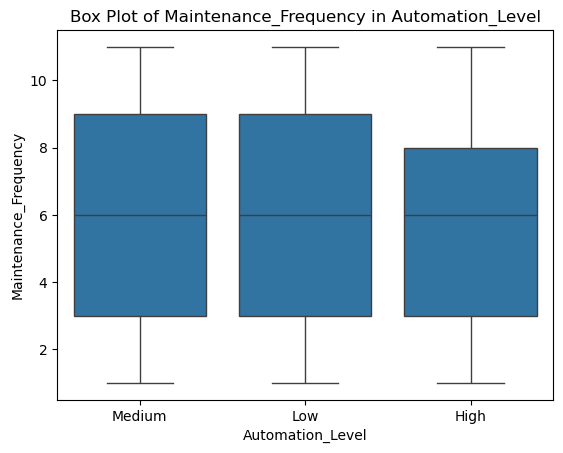

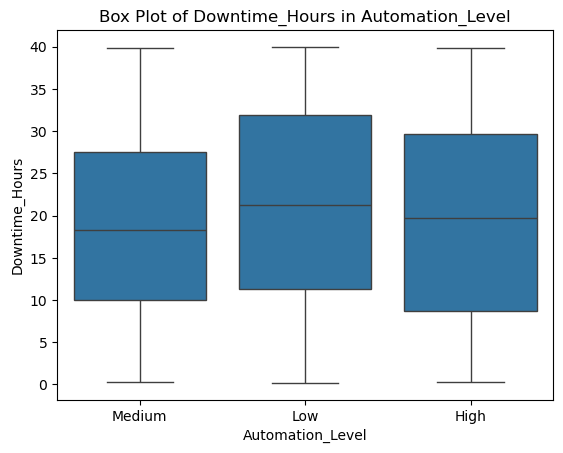

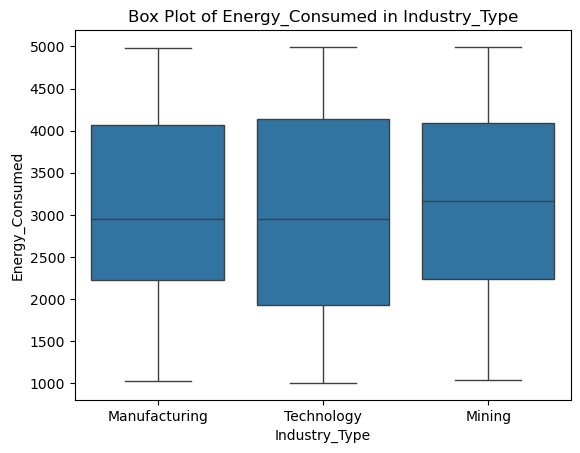

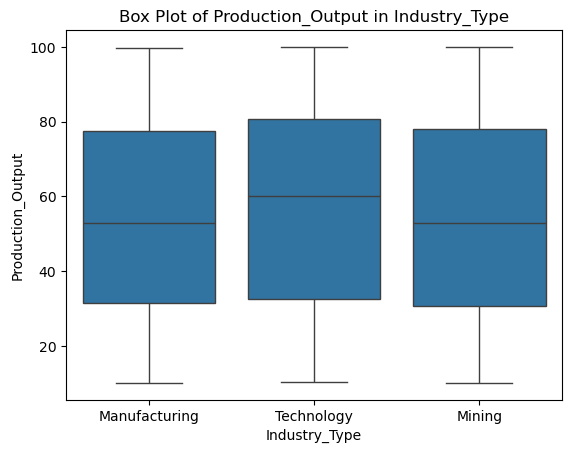

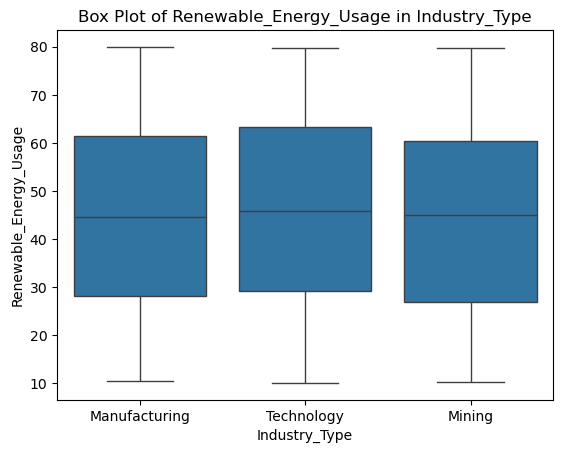

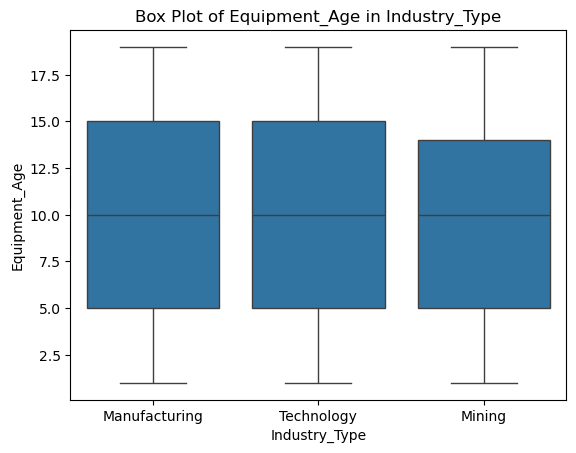

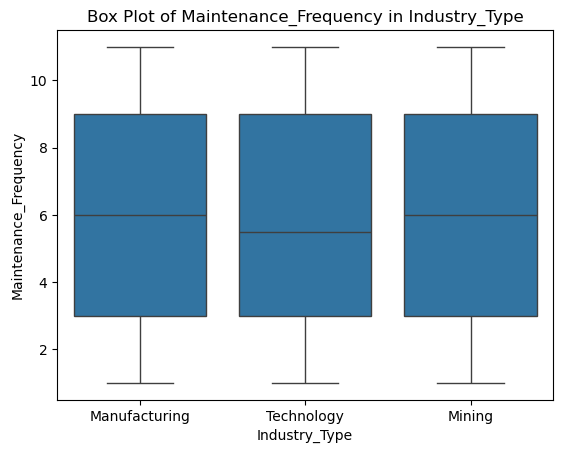

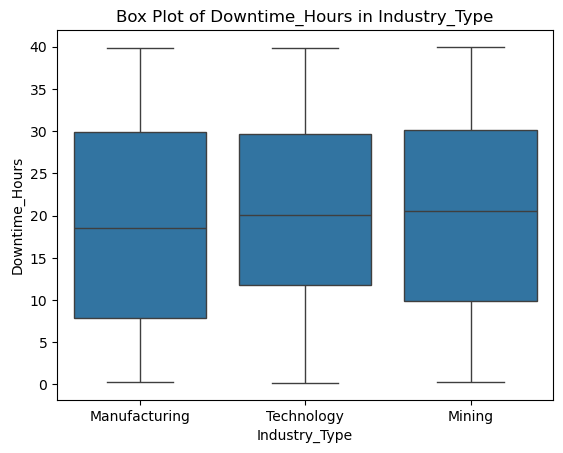

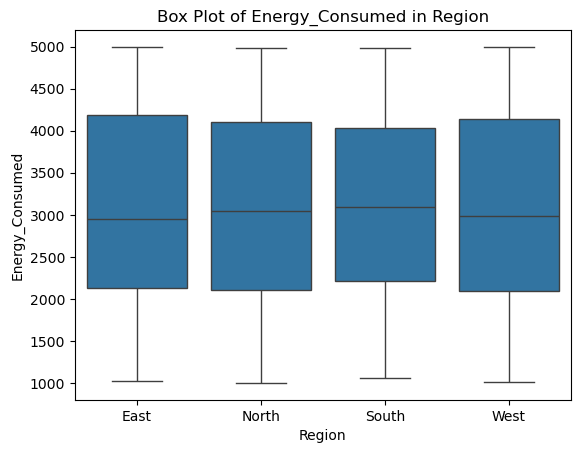

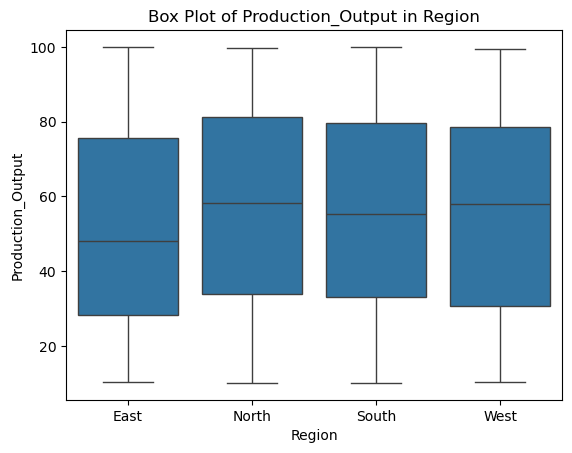

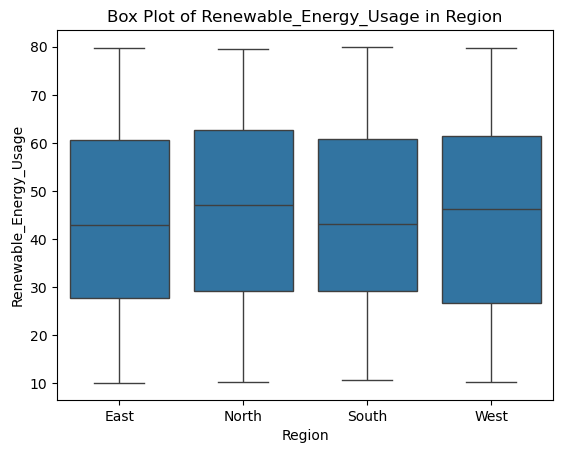

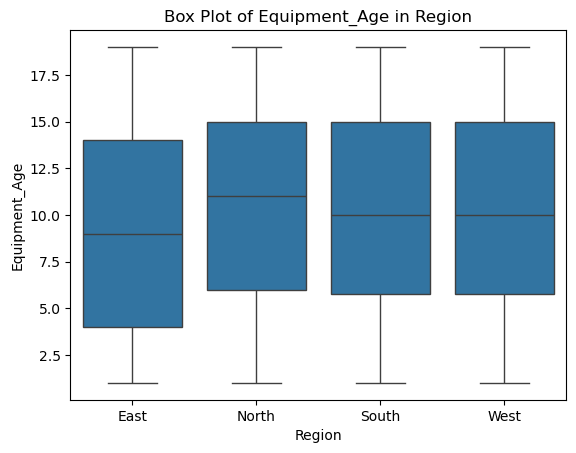

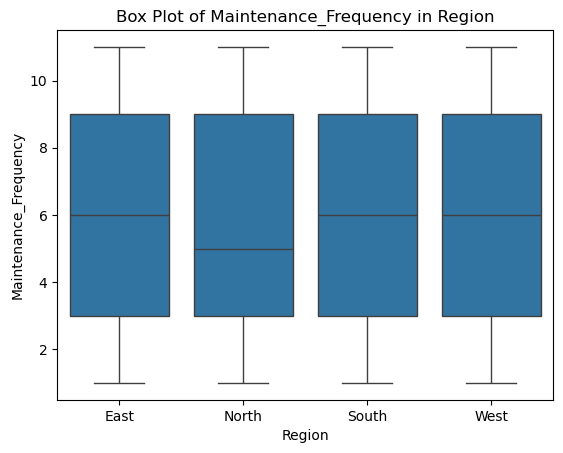

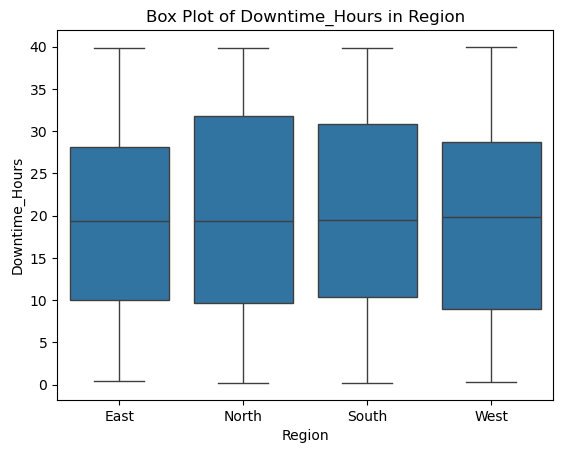

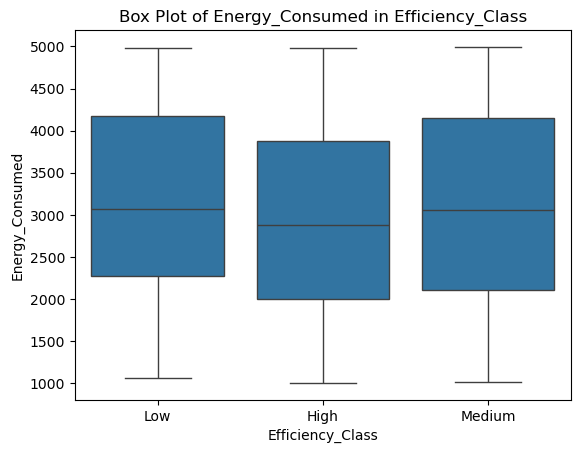

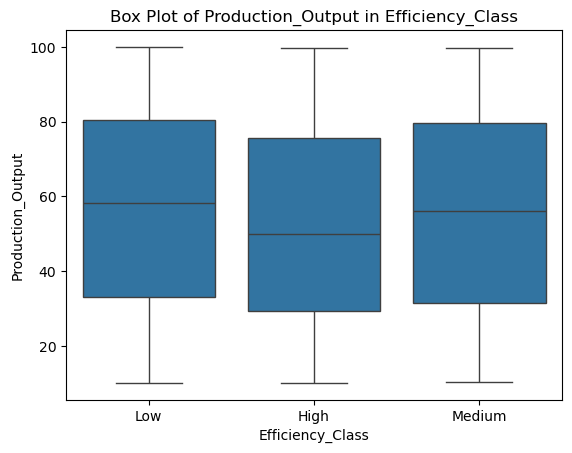

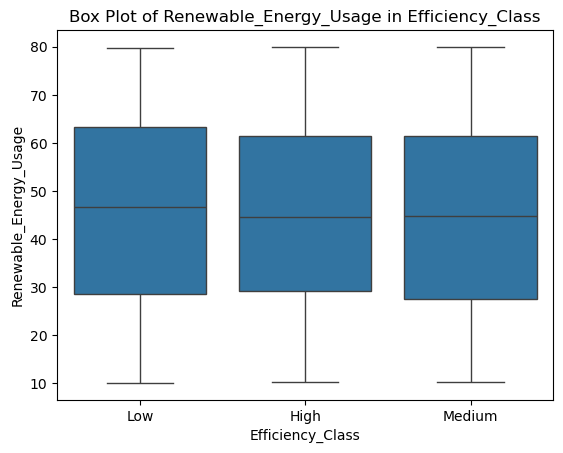

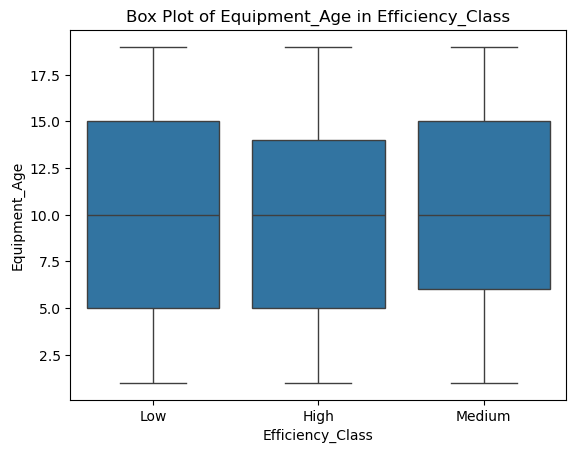

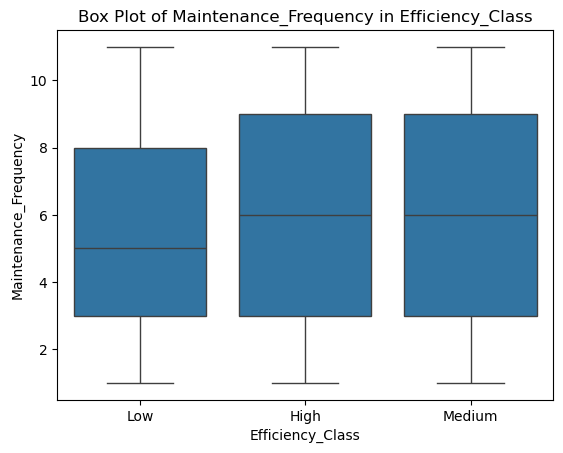

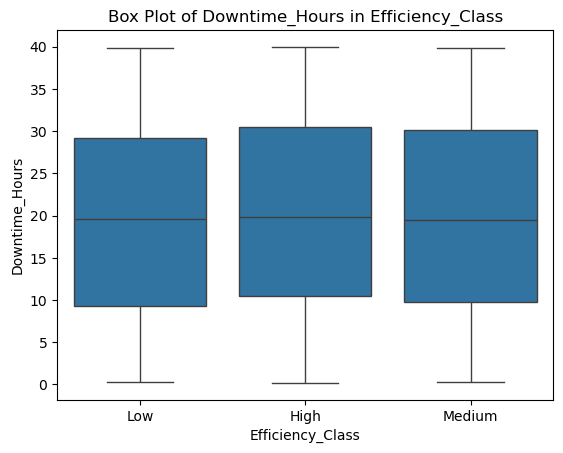

In [181]:
for cat in categorial_columns:
    for num in numerical_columns: 
        sns.boxplot(x=cat,y=num,data=df)
        plt.title('Box Plot of ' +num +' in ' +cat )
        plt.show()
    

In [217]:
# Do Some Outliers check using zscore
from scipy.stats import zscore

for col in numerical_columns:
    z = zscore(df[col])
    outliers = z.abs() > 3
    print('Outliers',outliers)


Outliers 0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Name: Energy_Consumed, Length: 1000, dtype: bool
Outliers 0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Name: Production_Output, Length: 1000, dtype: bool
Outliers 0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Name: Renewable_Energy_Usage, Length: 1000, dtype: bool
Outliers 0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Name: Equipment_Age, Length: 1000, dtype: bool
Outliers 0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Name: Maintenance_Frequency, Length: 

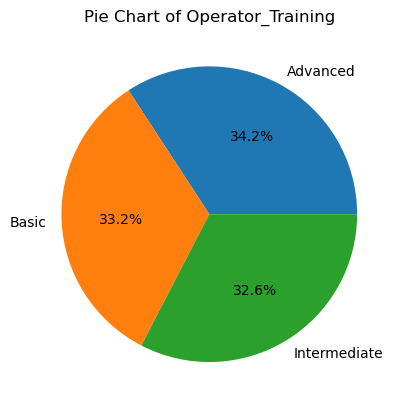

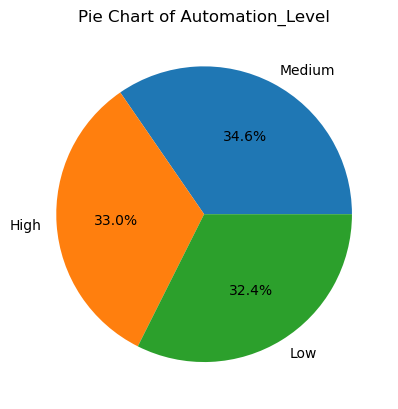

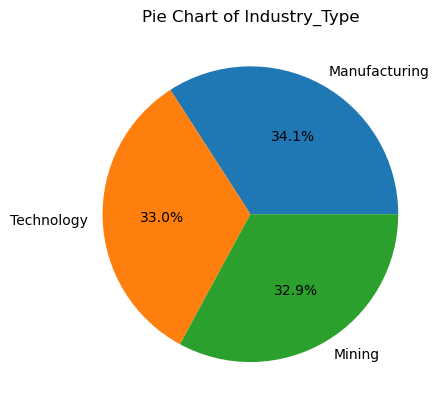

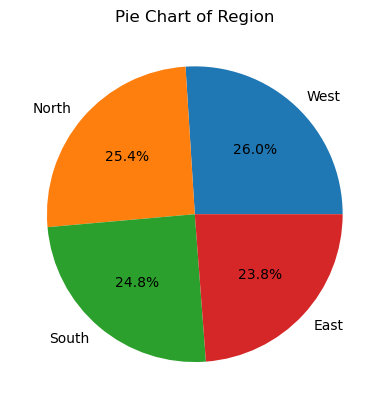

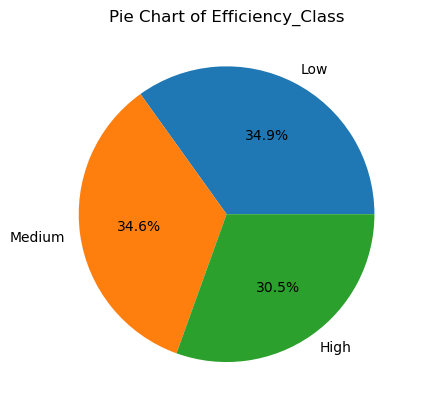

In [223]:
for category in categorial_columns:
    df[category].value_counts().plot.pie(autopct='%1.1f%%')
    plt.title('Pie Chart of ' +category)
    plt.ylabel('')
    plt.show()


In [225]:
py

NameError: name 'python' is not defined